# Lab 4: Predicting breast cancer with machine learning

In this lab we'll read up our training and test data to create a logistic regression model. We'll use different techniques to evaluate the model and use the model for prediction on a held-out dataset. 

#### Libraries used in this lab:
[pandas docs](https://pandas.pydata.org/pandas-docs/stable/)

[seaborn docs](https://seaborn.pydata.org/)

[matplotlib docs](https://matplotlib.org/contents.html)

[numpy docs](https://docs.scipy.org/doc/numpy-1.15.1/reference/index.html)

[sklearn docs](https://scikit-learn.org/stable/documentation.html)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn
%matplotlib inline

In [ ]:
# read in data prepared from lab 2, split into two data sets
train = pd.read_csv("data_sets/train.csv")
test = pd.read_csv("data_sets/test.csv")

## Creating a Logistic Regression Model

In this section we do last preparations on the datasets before creating a model. 

In [25]:
# encode B/M (Benign/Malignant) labels to 0/1. This transformation fascilitates model evaluation downstream

def trans
from sklearn import preprocessing
le = sklearn.preprocessing.LabelEncoder()
le.fit(train['diagnosis'])
train['diagnosis_code'] = le.transform(train['diagnosis']) 

le.fit(test['diagnosis'])
test['diagnosis_code'] = le.transform(test['diagnosis']) 

# ensure that values 1 = Malignant, 0 = Benign
train.head()
print(len(train))
print(len(test))

426
143


In [38]:
# create list of features 
features = train.columns.tolist()
features.remove('diagnosis')

# fit model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(train[features], train['diagnosis_code'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

## Evaluate model on test set

Use held out test data to evaluate model for accuracy, error, and other metrics. Essentially we are comparing the predicted class against the true class for each example in the test set. 

In [40]:
# create 
test_pred = logreg.predict(test[features])
test_true = test['diagnosis']

# error and accuracy of model
from sklearn import metrics
# print('log loss (error) on test set: {:.2f}'.format(metrics.log_loss(test_true, test_pred)))
print('Accuracy of model on test set: {:.2f}'.format(metrics.accuracy_score(test_true, test_pred)))

Accuracy of model on test set: 0.88


if we plot the probabilities what do we see? does the sigmoid shape give us the best discrimiatino between classes?

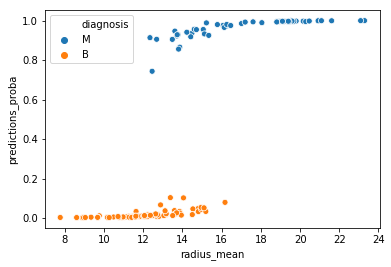

In [31]:
# plot predictions, sigmoid

test['predictions_proba'] = logreg.predict_proba(test[features])[:,1]
sns.scatterplot(x="radius_mean", y="predictions_proba", hue = "diagnosis", data=test)

try out a few different values for C, can you make accuracy go up and error go down? why?

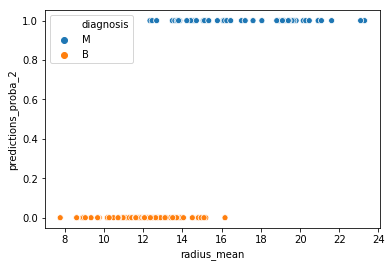

In [32]:
#regularization
logreg2 = LogisticRegression(solver='lbfgs', penalty="l2", C=10000000000, max_iter=10000)
logreg2.fit(train[features], train['diagnosis_code'])
test['predictions_proba_2'] = logreg2.predict_proba(test[features])[:,1]
sns.scatterplot(x="radius_mean", y="predictions_proba_2", hue = "diagnosis", data=test)

In [25]:
y_pred2 = logreg2.predict(test[features])
print('log loss of regularized logistic regression classifier on test set: {:.2f}'.format(metrics.log_loss(y_true, y_pred2)))
print('Accuracy of regularized logistic regression classifier on test set: {:.2f}'.format(logreg2.score(test[features], y_true)))


log loss of regularized logistic regression classifier on test set: 2.90
Accuracy of regularized logistic regression classifier on test set: 0.92


In [86]:
#bias v variance